# Uber Pickups NYC Analysis

This notebook is going to analyze trip data for over 20 million Uber (and other for-hire vehicle) trips in NYC.

Questions:
- Most common pickup time (hour)?
- Most common neighborhood?
- Most common borough?

Author: Deena Kohanbani

Dataset: https://www.kaggle.com/datasets/fivethirtyeight/uber-pickups-in-new-york-city

In [155]:
# imports and load dataset
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("uber-raw-data-janjune-15.csv")
print(df.head())

  Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90


In [156]:
# Convert date column from string to datetime
df['Pickup_date'] = pd.to_datetime(df['Pickup_date'])
# Get the mode
df['Pickup_date'].dt.hour.mode()

0    19
Name: Pickup_date, dtype: int64

In [158]:
# Get value counts to check frequency for each hour
counts = df['Pickup_date'].dt.hour.value_counts()
counts = counts.sort_index()
counts

0      602178
1      394510
2      260603
3      183655
4      173038
5      193523
6      288533
7      443543
8      583348
9      593437
10     520092
11     516716
12     533021
13     537909
14     584463
15     649414
16     737170
17     863990
18     987093
19    1007464
20     948574
21     930462
22     922954
23     814789
Name: Pickup_date, dtype: int64

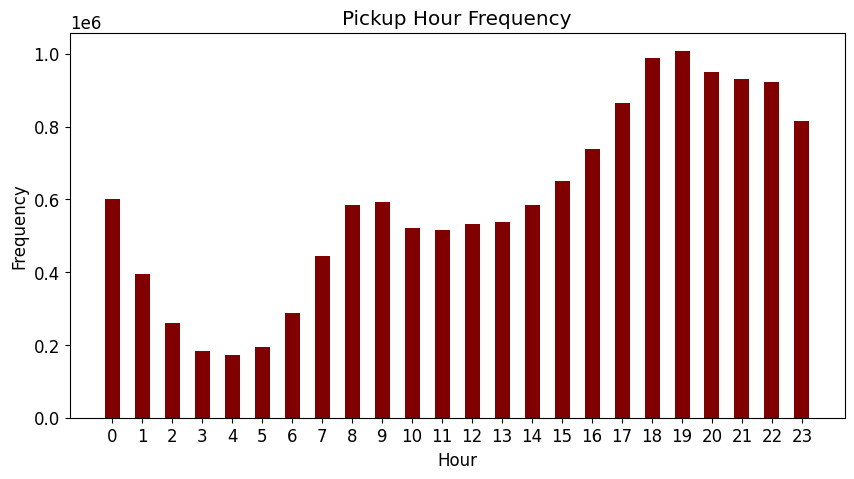

In [159]:
# Bar chart for hour frequency
fig = plt.figure(figsize = (10, 5))
plt.rcParams.update({'font.size': 12})
plt.bar(counts.index, counts.values, color = 'maroon', width = 0.5)
plt.xlabel("Hour")
plt.xticks(counts.index)
plt.ylabel("Frequency")
plt.title("Pickup Hour Frequency")
plt.show()

# Most Common Pickup Hour

As seen in the code and chart above, the evening is the most common time to get picked up.

The most common hour was **7pm**

The number of times someone was picked up in this dataset between 7-8pm was **1007464** times.

In [161]:
# Our dataframe only has location ID, but we want to use another
# dataset to be able to get the zone and the borough for the given location ID.

location_df = pd.read_csv('taxi-zone-lookup.csv')
def get_borough_from_id(id):
  return location_df[location_df['LocationID'] == id].iloc[0]['Borough']
def get_zone_from_id(id):
  return location_df[location_df['LocationID'] == id].iloc[0]['Zone']

# Print the mode for borough and the mode for zone
mode_borough = get_borough_from_id(df['locationID'].mode().values[0])
mode_zone = get_zone_from_id(df['locationID'].mode().values[0])
print(mode_borough, mode_zone)

Manhattan Midtown Center


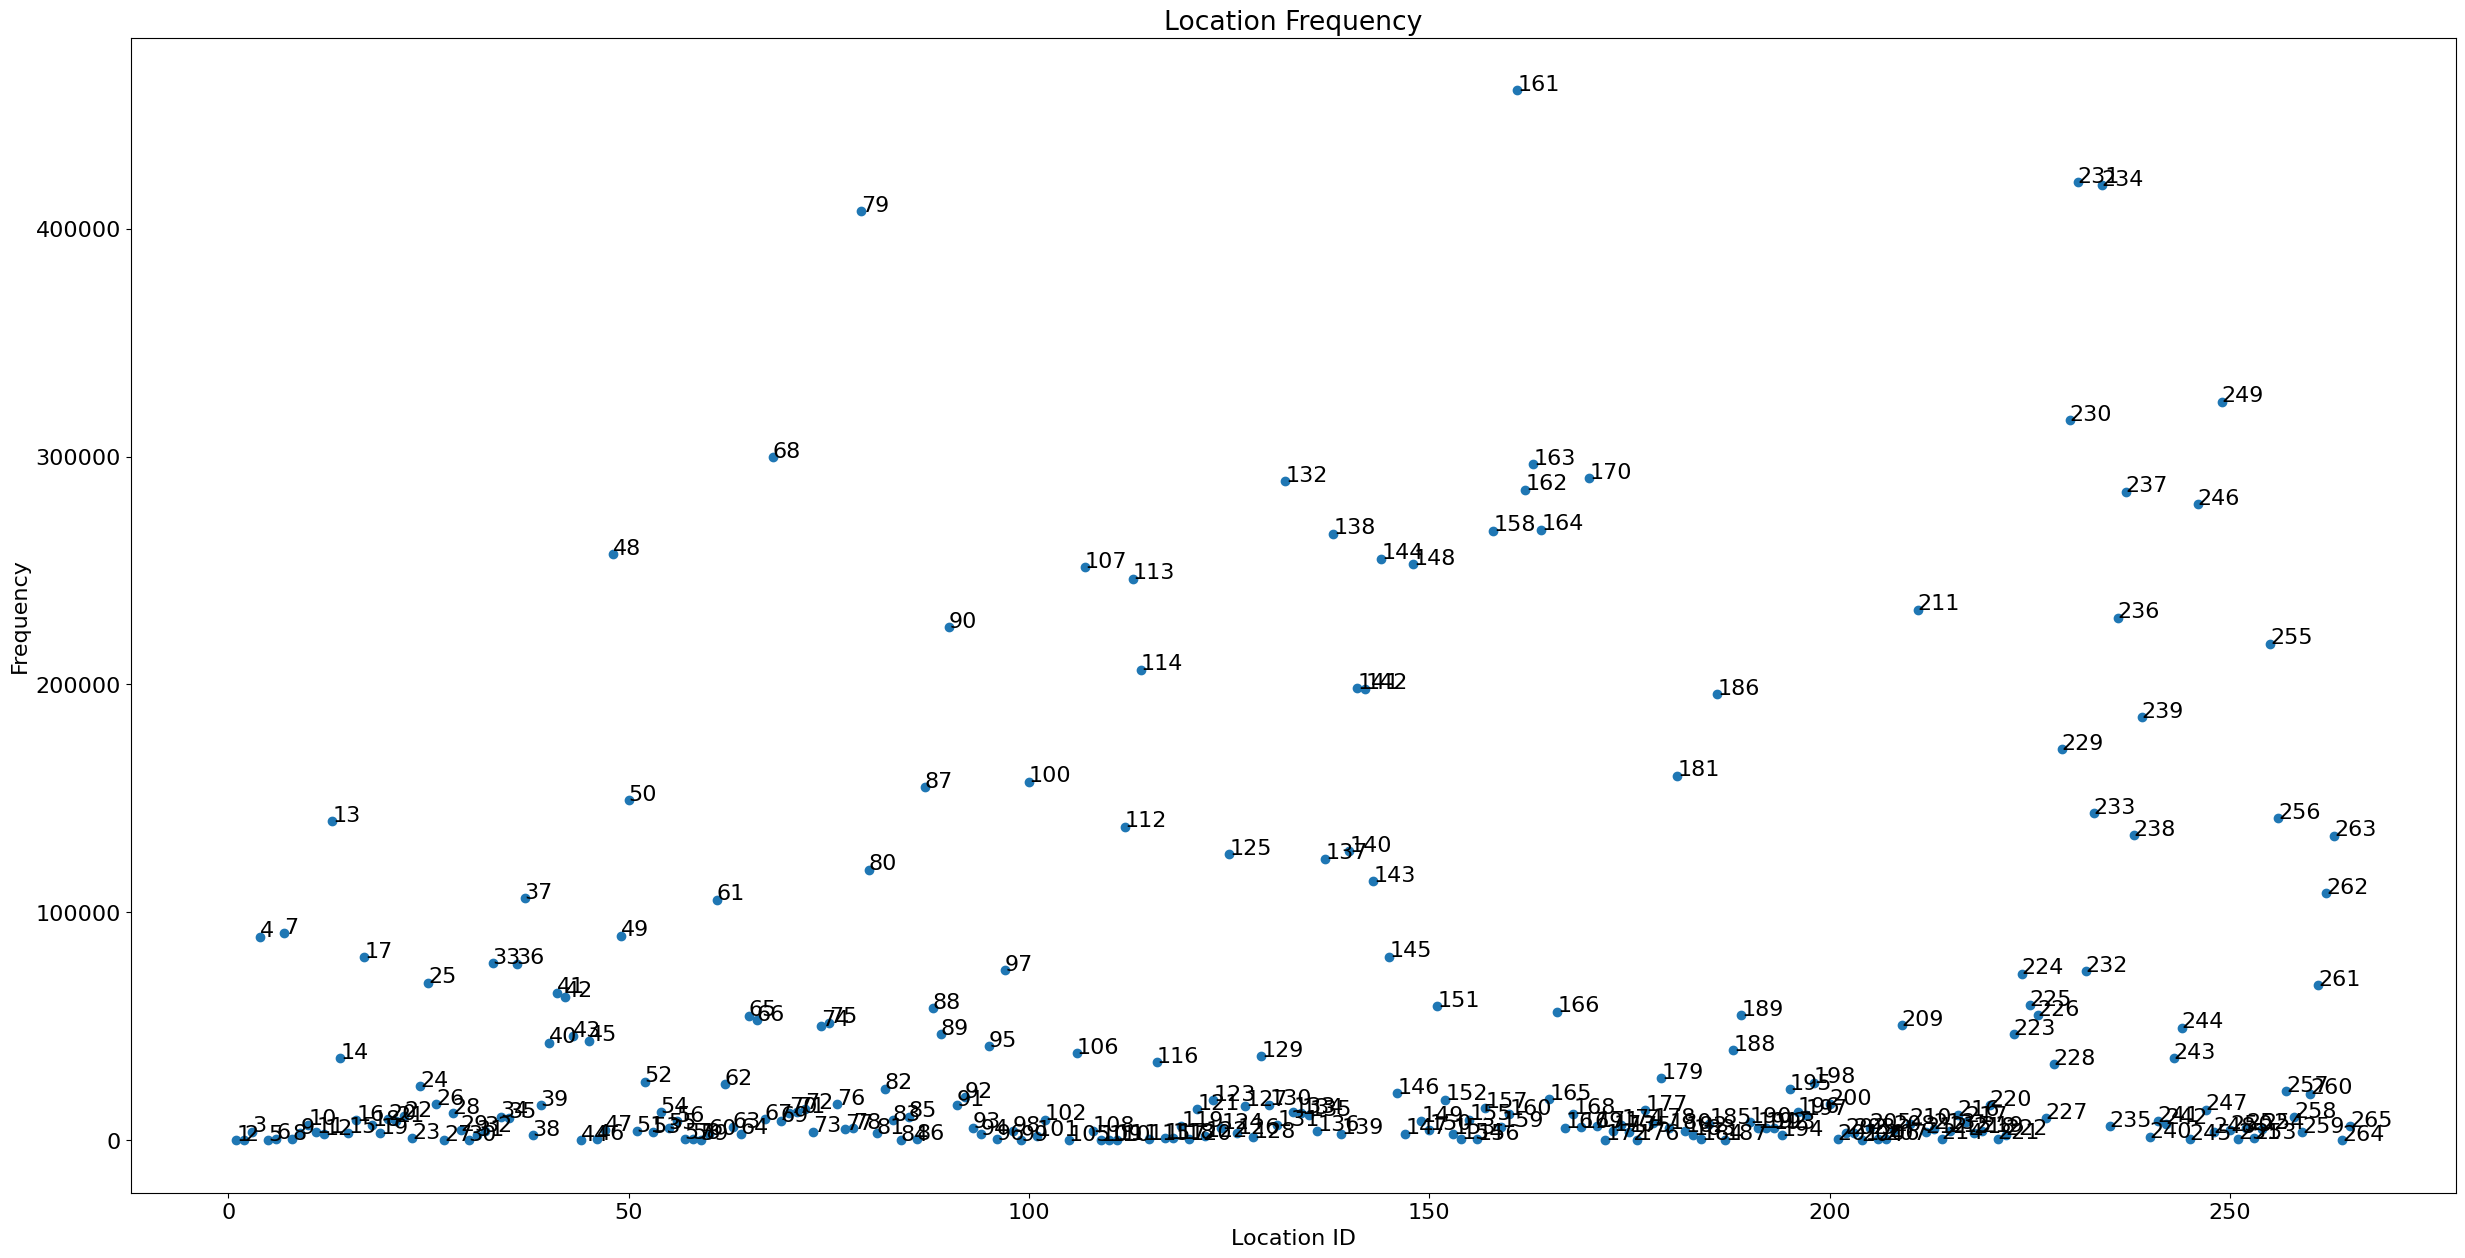

In [162]:
# Chart of location ID and frequencies
counts = df['locationID'].value_counts()
plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize = (30, 15))
plt.scatter(counts.index, counts.values)
plt.xlabel("Location ID")
plt.ylabel("Frequency")
plt.title("Location Frequency")
for (i, j) in zip(counts.index, counts.values):
    plt.text(i, j, i)
plt.show()

In [163]:
# Adding new columns for boroughs and zones to our original dataframe
borough_map = {}
zone_map = {}
for i in range(len(location_df)):
  row = location_df.iloc[i]
  location_id = row['LocationID']
  borough = row['Borough']
  zone = row['Zone']
  borough_map[location_id] = borough
  zone_map[location_id] = zone

df['Boroughs'] = df['locationID'].apply(lambda x : borough_map[x])
df['Zones'] = df['locationID'].apply(lambda x : zone_map[x])
df.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Boroughs,Zones
0,B02617,2015-05-17 09:47:00,B02617,141,Manhattan,Lenox Hill West
1,B02617,2015-05-17 09:47:00,B02617,65,Brooklyn,Downtown Brooklyn/MetroTech
2,B02617,2015-05-17 09:47:00,B02617,100,Manhattan,Garment District
3,B02617,2015-05-17 09:47:00,B02774,80,Brooklyn,East Williamsburg
4,B02617,2015-05-17 09:47:00,B02617,90,Manhattan,Flatiron


In [110]:
df['Boroughs'].value_counts()

Manhattan        10371060
Brooklyn          2322000
Queens            1343945
Bronx              220146
Staten Island        6959
Unknown              6264
EWR                   105
Name: Boroughs, dtype: int64

In [111]:
df['Zones'].value_counts()

Midtown Center                                   460732
TriBeCa/Civic Center                             420356
Union Sq                                         419045
East Village                                     407591
West Village                                     323989
                                                  ...  
Rossville/Woodrow                                    24
Governor's Island/Ellis Island/Liberty Island        12
Freshkills Park                                       9
Jamaica Bay                                           8
Great Kills Park                                      2
Name: Zones, Length: 260, dtype: int64

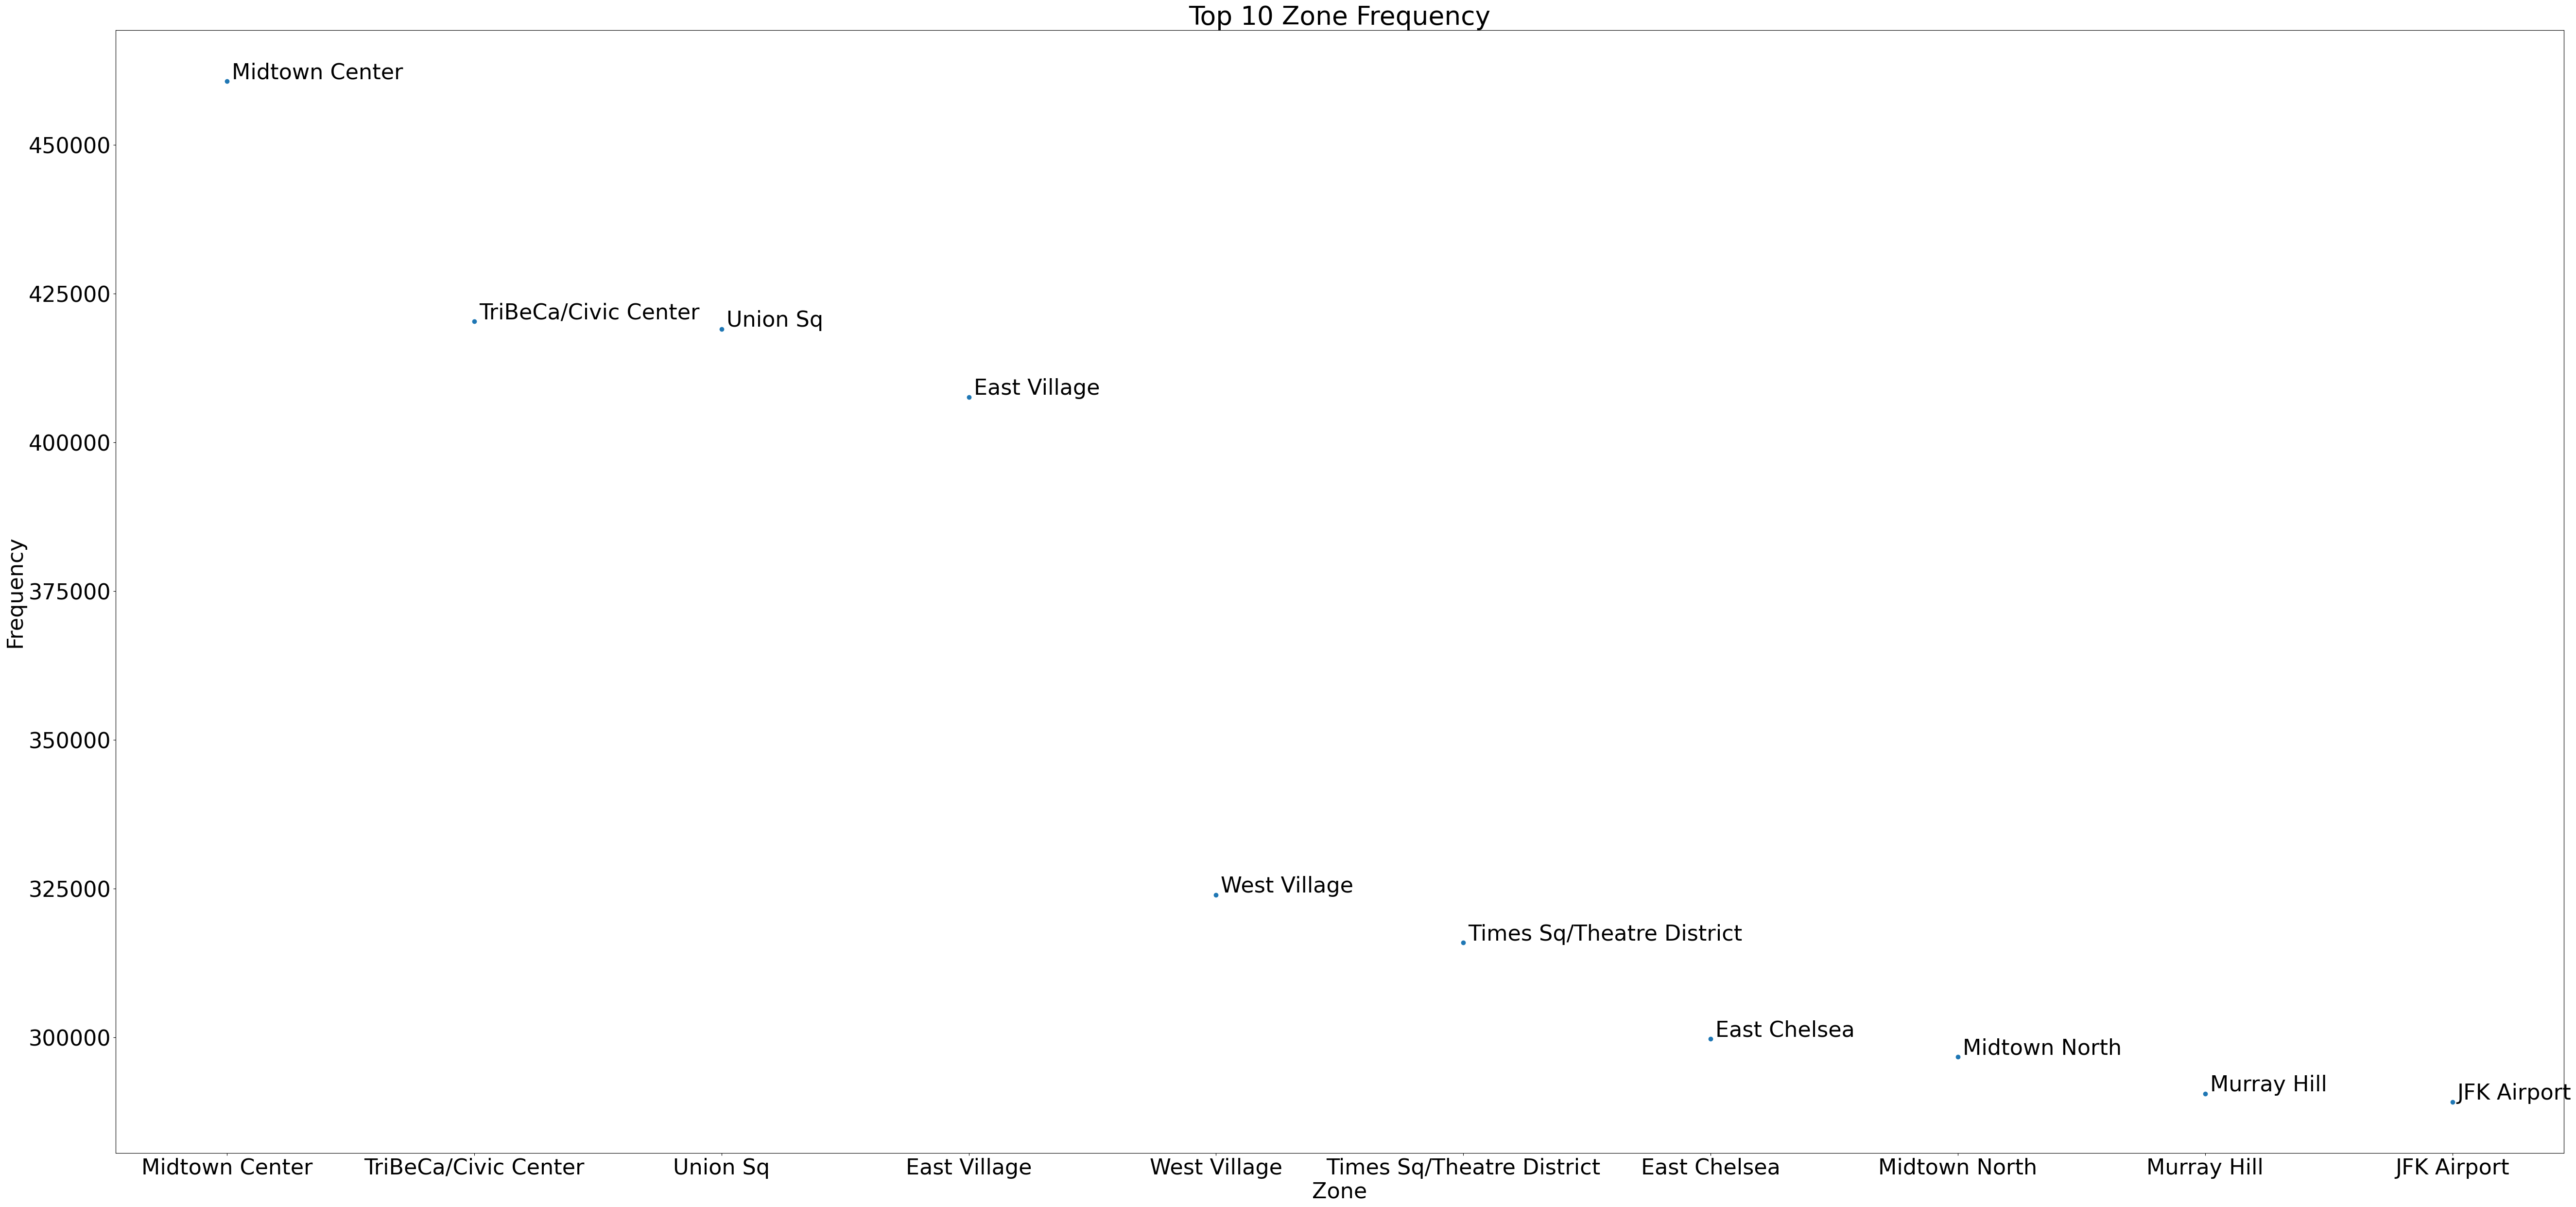

In [164]:
# Creating scatterplot of Zone frequency
counts = df['Zones'].value_counts().head(10)
plt.rcParams.update({'font.size': 32})
fig = plt.figure(figsize = (65, 30))
plt.scatter(counts.index, counts.values)
plt.xlabel("Zone")
plt.ylabel("Frequency")
plt.title("Top 10 Zone Frequency")
for i, txt in enumerate(counts.index):
    plt.annotate(txt, (counts.index[i], counts.values[i]), xytext=(10, 5), textcoords='offset pixels')
plt.show()

# Most Common Pickup Location

From the code and charts above, we know the most common pickup borough is **Manhattan**

The neighborhood or zone with the most pickups is **Midtown Center** with **460732** pickups.

The top 9 zones in the dataset are all located in Manhattan.